In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def grid_pad(image_tensor, tile_size):
    padding = 2
    tile_size = tile_size
    size_with_padding = (32 + 2 * padding, 32 + 2 * padding)
    patches = torch.nn.functional.unfold(image_tensor, kernel_size=size_with_padding, stride=tile_size, dilation=1, padding=padding)
    patches = patches.view(3, size_with_padding[0], size_with_padding[1], -1).permute(3, 0, 1, 2)
    return patches

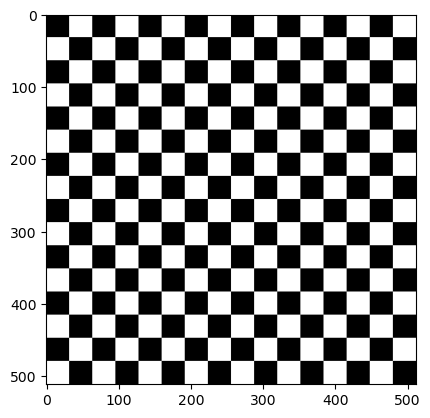

patches: (256, 36, 36, 3)


In [18]:
checkerboard = []
for i in range(8):
    checkerboard.append([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1])
    checkerboard.append([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])
checkerboard = torch.tensor(checkerboard)
checkerboard = torch.nn.functional.interpolate(checkerboard.unsqueeze(0).unsqueeze(0).float(), size=(512,512), mode="nearest").squeeze(0).squeeze(0)
checkerboard = torch.stack([checkerboard, checkerboard, checkerboard], dim=0)
checkerboard = checkerboard.permute(1,2,0).numpy()

plt.imshow(checkerboard)
plt.show()

image = checkerboard
image_tensor = torch.from_numpy(image).permute(2,0,1).unsqueeze(0)

patches = grid_pad(image_tensor, (32,32))
patches = patches.permute(0,2,3,1).numpy()
print("patches:", patches.shape)

# tile_size = (32,32)
# size_with_padding = (tile_size[0]+2, tile_size[1]+2)
# print("image_tensor:", image_tensor.shape)
# patches = torch.nn.functional.unfold(image_tensor, kernel_size=size_with_padding, stride=tile_size, dilation=1, padding=1)
# patches = patches.view(3, size_with_padding[0], size_with_padding[1], -1).permute(3, 0, 1, 2)

# patches = patches.permute(0,2,3,1).numpy()
# print("patches:", patches.shape)
# plt.imshow(patches[5])

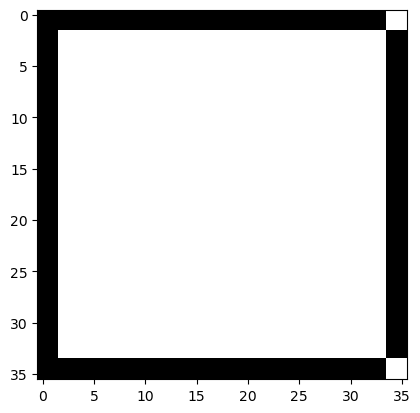

In [19]:
plt.imshow(patches[16,:,:,:])